# Resample data

1. Load the PKL file containing P, T and XYZ
2. Resample the signal to obtain a homogeneous timestep
2. Plot the timeseries and their histograms
5. Save the resampled signal

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle, random

In [2]:
# Load data
RAWFILE = "pickledData_constg/PTX(2).pkl"
with open(RAWFILE,'rb') as f: rawdata = pickle.load(f)
T,X,P = rawdata['Time'],rawdata['xCoord'],rawdata['P']

In [3]:
# Resample data to get unique timestep
signal_size = int(len(T)*1.1)
Tres = np.linspace(T.iloc[0],T.iloc[-1],signal_size)
Pres = pd.DataFrame()

for x in list(P.columns):
    Pres[x] = np.interp(Tres[:,0],T.loc[:,0].to_numpy(),P.loc[:,x].to_numpy())

In [4]:
# Chop to get a signal 2^something long and Set time to zero
powSize = 15
while len(P) < 2**powSize:
    powSize =- 1

print(f"Resampled signal will be 2^{powSize} long")
Pres, Tres = Pres[:2**powSize], Tres[:2**powSize]

Resampled signal will be 2^15 long


In [5]:
print(f"Size of the raw signal len(P) >> {len(P)}")
print(f"Size of the resampled signal  >> {len(Pres)}")

Size of the raw signal len(P) >> 50000
Size of the resampled signal  >> 32768


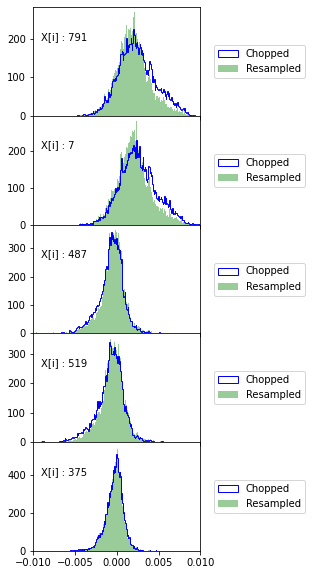

In [6]:
# Plot a histogram comparison of the full signal and the resampled one
nSample = 5
fig,axs = plt.subplots(nrows=nSample,ncols=1,sharex=True,figsize=[3,10],gridspec_kw={"hspace":0})

hist_dict_full = dict(bins='sqrt',density=True,alpha=1.0,color='b',histtype='step',label='Chopped')
hist_dict_resm = dict(bins='sqrt',density=True,alpha=0.4,color='g',label='Resampled')

for ax,x in zip(axs,random.sample(list(P.columns),nSample)):
    ax.hist(P.loc[:,x],**hist_dict_full)
    ax.hist(Pres.loc[:,x],**hist_dict_resm)
    ax.text(0.05,0.70,f"X[i] : {x}",transform=ax.transAxes)
    ax.legend(loc='center left',bbox_to_anchor = [1.05,0.5])
ax.set(xlim=[-0.01,0.01])
plt.show()

In [7]:
# Merge time and X-coord as index and column keys
Pres['Time'] = Tres[:32768] - Tres[0]
Pres.set_index('Time',inplace=True)
Pres.rename(columns=X['X'],inplace=True)

In [8]:
# Pickle data
NEWFILE = "pickledData_constg/PTX(3).pkl"
with open(NEWFILE,'wb') as f: pickle.dump(Pres,f)

In [20]:
# Delta time
dT = Pres.index[1] - Pres.index[0]
print("Delta time = {:.14f} s".format(dT))

Delta time = 0.00485424825911 s


In [22]:
# Delta time for OPENFOAM
print("Delta time = {:.13f} s".format(dT * 10))

Delta time = 0.0485424825911 s


In [ ]:
0.004854248259107408